In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(1)
X = np.random.multivariate_normal([0,0],[[1,0],[0,1]], 200)
Y = np.zeros(200)

for i in range(200):
  if X[i][0]+X[i][1] > 0:
    Y[i] = 1
  else :
    Y[i] = -1


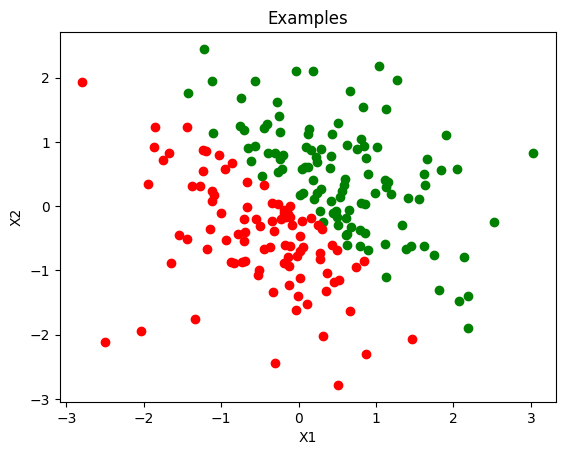

In [ ]:
plt.figure()
plt.title("Examples")
plt.plot(X[Y == 1,0],X[Y == 1,1],'go')
plt.plot(X[Y == -1,0],X[Y == -1,1],'ro')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
from sklearn.svm import SVC
clf = SVC(C = 10, kernel = 'linear')
clf.fit(X,Y)

SVC(C=10, kernel='linear')

In [ ]:
w = clf.coef_[0]
w

array([5.64930167, 5.69023307])

In [ ]:
bias = clf.intercept_
bias[0]

0.02714925263184051

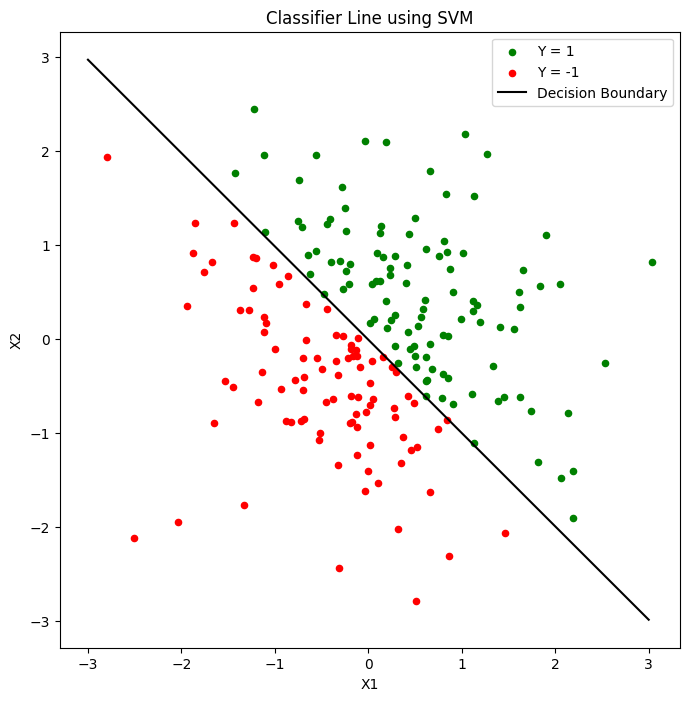

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Classifier Line using SVM")
plt.scatter(X[Y == 1,0],X[Y == 1,1],color='green',label='Y = 1',s=20)
plt.scatter(X[Y == -1,0],X[Y == -1,1],color='red',label='Y = -1',s=20)
plt.xlabel('X1')
plt.ylabel('X2')

x1 = np.linspace(-3,3) #we get the equation of hyperplane w[0]x1 + w[1]x2 + c = 0
x2 = -(w[0]/w[1])*x1 - bias[0]/w[1]
plt.plot(x1, x2, 'k-', label = 'Decision Boundary')
plt.legend()
plt.show()

#Question 3

In [ ]:
beta_star = np.array((bias[0],w[0],w[1]))
beta = np.array((bias[0],0,0))
print("beta* : ",beta_star)
print("beta : ",beta)

beta* :  [0.02714925 5.64930167 5.69023307]
beta :  [0.02714925 0.         0.        ]


In [ ]:
def grad_fi(Xi,Yi,beta):
  if (Yi*(Xi.dot(beta)))<=1:
    return -Yi*(Xi[1:])
  else :
    return 0*(Xi[1:])

In [ ]:
def SGD(X,Y,beta_, beta_star,C,tol,Sn,gamma):#,max_iter=10000):
  X_ = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
  beta = [beta_]
  error = [0]
  error[0] = np.linalg.norm(beta[0]-beta_star)
  k = 0
  g = 0
  while (error[k] > tol):# and k<max_iter):
    g = (Sn/(200*C))*beta[k][1:]
    S = np.random.choice(X.shape[0], Sn)
    for i in S:
      f = grad_fi(X_[i],Y[i],beta[k])
      g+=f
    beta_new = np.concatenate((beta[k][0:1], beta[k][1:] - gamma * g))
    beta.append(beta_new)
    k+=1
    error.append(np.linalg.norm(beta_new - beta_star))
  return beta,error

In [ ]:
beta_sgd_5, err_sgd_5 = SGD(X, Y, beta, beta_star, C = 10, tol=0.1, Sn = 5, gamma=0.1)
print(beta_sgd_5[-1])
print('Number of Iterations = ',len(beta_sgd_5))

[0.02714925 5.58651778 5.64285887]
Number of Iterations =  1350


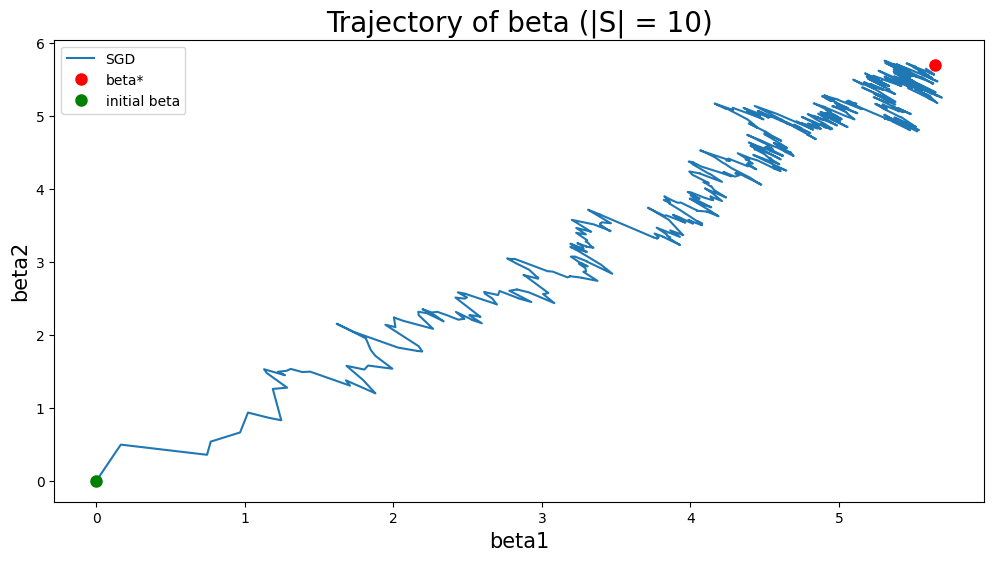

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Trajectory of beta (|S| = 10)', fontsize=20)
plt.plot([beta_sgd_5[i][1] for i in range(len(beta_sgd_5))], [beta_sgd_5[i][2] for i in range(len(beta_sgd_5))], label='SGD')
plt.plot([beta_star[1]], [beta_star[2]], 'ro', label='beta*', markersize=8)
plt.plot(0, 0, 'go', label='initial beta', markersize=8)
plt.xlabel('beta1', fontsize=15)
plt.ylabel('beta2', fontsize=15)
plt.legend()
plt.show()

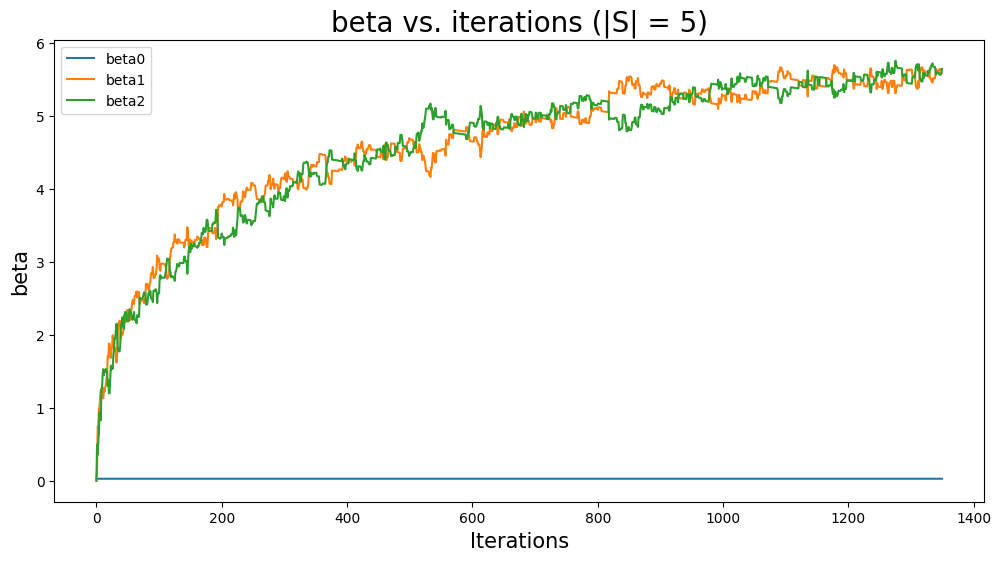

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('beta vs. iterations (|S| = 5)', fontsize=20)
plt.plot([beta_sgd_5[i][0] for i in range(len(beta_sgd_5))], label='beta0')
plt.plot([beta_sgd_5[i][1] for i in range(len(beta_sgd_5))], label='beta1')
plt.plot([beta_sgd_5[i][2] for i in range(len(beta_sgd_5))], label='beta2')
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('beta', fontsize=15)
plt.legend()
plt.show()